<a href="https://colab.research.google.com/github/maxidiazbattan/covid-vaccination-latinamerica/blob/main/covid_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import io
import json

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set standard notation instead scientific

In [3]:
# Downloading the csv file from the OWID GitHub account
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [4]:
# Downloading the csv file with the latitude and longitude of the world countries for a future choropleth map
lat_long = pd.read_html ('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [5]:
# Changing the lat_long list into a numpy array and reshaping it
lat_long = np.array(lat_long)
lat_long = lat_long.reshape(-1, 4)

In [6]:
# Changing the lat_long array into a pandas dataframe 
df_lat_long = pd.DataFrame(lat_long, columns = ['country', 'latitude', 'longitude', 'location'])

In [7]:
# Changing the date format into datetime
df['date'] = pd.to_datetime (df['date'])

In [8]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [9]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,year
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,22,2,2021
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,23,2,2021
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,24,2,2021
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,25,2,2021
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,26,2,2021


In [10]:
# Grouping countries by location
df_loc = df.groupby('location', as_index = False).mean()

In [11]:
df_loc.sample(5)

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,year
184,Singapore,2392541.94,1472937.36,1011565.03,62396.00,32350.10,40.90,25.18,17.29,5529.63,15.76,3.77,2021.00
119,Low income,3830213.74,3476225.53,438191.92,73661.31,62945.33,0.49,0.45,0.06,81.17,15.69,4.39,2021.00
215,United Arab Emirates,8427654.26,5557431.29,4541672.14,83951.97,80781.15,85.21,56.19,45.92,8167.61,15.41,3.71,2021.00
20,Belgium,3502033.56,2432248.47,1119991.94,61126.33,59649.74,30.22,20.99,9.66,5146.84,15.47,3.81,2020.98
134,Mongolia,1920038.46,1146059.29,1104725.89,40041.53,28319.15,58.57,34.96,33.70,8638.44,15.57,4.51,2021.00


In [13]:
la_countries = ['Argentina', 'Brazil', 'Bolivia', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Peru', 'Ecuador', 'Mexico']

In [14]:
# Checking if the countries on la_countries list, are present in the dataframe by a simple list comprehension
[country for country in df_loc['location'] if country in la_countries] 

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Mexico',
 'Paraguay',
 'Peru',
 'Uruguay']

In [44]:
df_la = df[df['location'].isin(la_countries)]
df_la.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,year
5936,Colombia,COL,2021-04-06,nan,nan,nan,nan,66295.00,nan,nan,nan,1303.00,6,4,2021
18550,Mexico,MEX,2021-02-03,686601.00,632439.00,54162.00,9062.00,4365.00,0.53,0.49,0.04,34.00,3,2,2021
22940,Peru,PER,2021-02-12,86872.00,86872.00,nan,32312.00,27677.00,0.26,0.26,nan,839.00,12,2,2021
22886,Paraguay,PRY,2021-05-17,254620.00,215728.00,38892.00,11810.00,10204.00,3.57,3.02,0.55,1431.00,17,5,2021
18703,Mexico,MEX,2021-07-06,48499324.00,33691170.00,20040922.00,759541.00,483729.00,37.62,26.13,15.54,3752.00,6,7,2021


In [16]:
df_lat_long[df_lat_long['location'].isin(la_countries)]

,country,latitude,longitude,location
10,AR,-38.42,-63.62,Argentina
27,BO,-16.29,-63.59,Bolivia
28,BR,-14.24,-51.93,Brazil
43,CL,-35.68,-71.54,Chile
46,CO,4.57,-74.30,Colombia
59,EC,-1.83,-78.18,Ecuador
153,MX,23.63,-102.55,Mexico
170,PE,-9.19,-75.02,Peru
182,PY,-23.44,-58.44,Paraguay
228,UY,-32.52,-55.77,Uruguay


In [17]:
df_la_group = df_la.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)

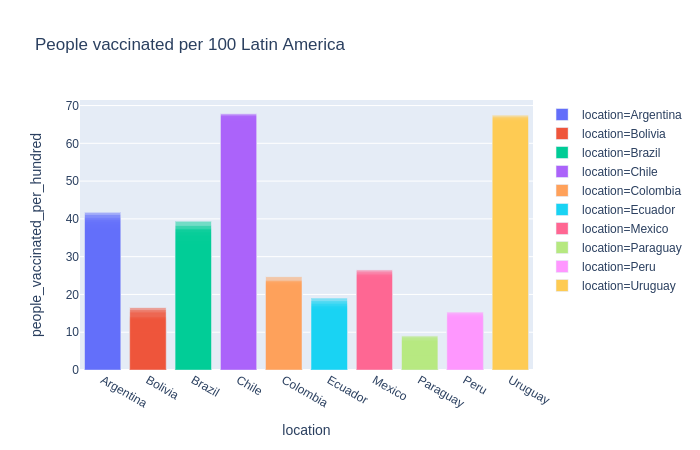

In [34]:
# Plotting the people vaccinated per hundred in latin american countries
g1 = px.bar (data_frame = df_la, x = 'location', y = 'people_vaccinated_per_hundred', color = 'location'  , barmode = 'overlay', title = 'People vaccinated per 100 Latin America')
g1.show('png')

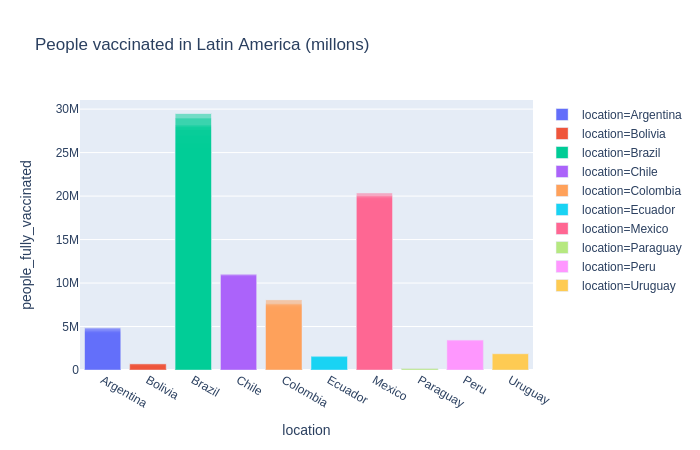

In [36]:
# People fully vaccinated in millions in latin american countries
g2 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated', color = 'location', barmode = 'overlay', title = 'People vaccinated in Latin America (millons)')
g2.show('png')

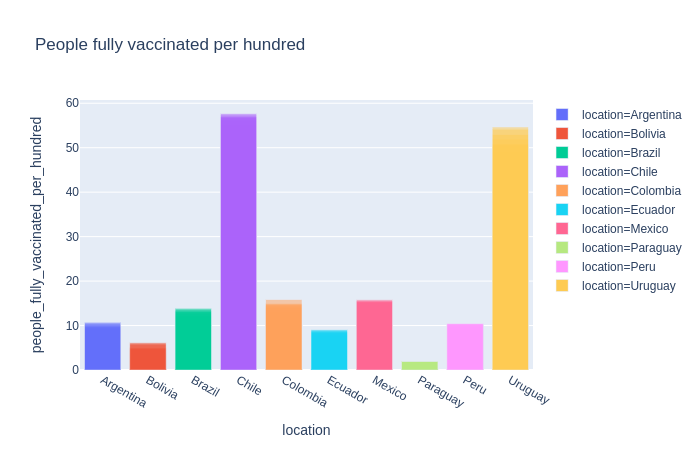

In [45]:
# People fully vaccinated per hundred in latin american countries
g3 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated_per_hundred', color = 'location', barmode = 'overlay', title = 'People fully vaccinated per hundred')
g3.show('png')

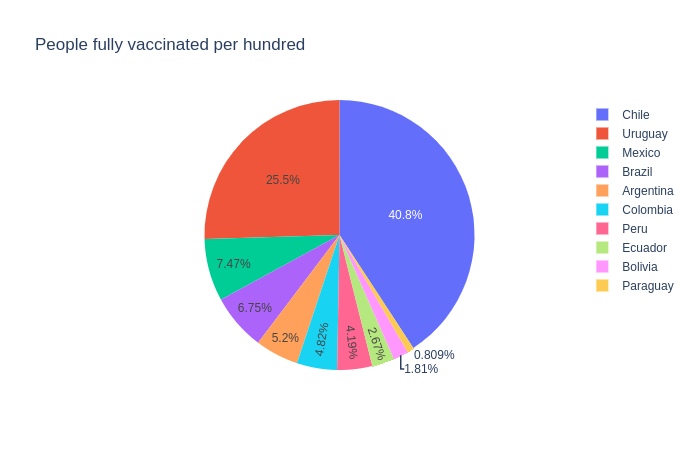

In [47]:
g4 = px.pie(data_frame = df_la, values = 'people_fully_vaccinated_per_hundred', names = 'location', title = 'People fully vaccinated per hundred')
g4.show('png')

In [48]:
# Merging the data frames (df_la_group & df_lat_long) for a plotting purpouse
merge_dfs = pd.merge(df_la_group, df_lat_long, on = 'location' ) 
merge_dfs.head()

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,year,country,latitude,longitude
0,Uruguay,1926190.83,1239239.88,888995.35,32380.50,31697.86,55.45,35.67,25.59,9125.06,15.25,4.61,2021.00,UY,-32.52,-55.77
1,Chile,10003108.37,5952657.27,4565624.33,121363.96,120030.47,52.33,31.14,23.88,6279.00,15.72,3.96,2020.96,CL,-35.68,-71.54
2,Brazil,34971649.70,24811448.13,11399374.50,608984.33,619022.26,16.45,11.67,5.36,2912.27,15.75,3.89,2021.00,BR,-14.24,-51.93
3,Colombia,6283104.05,5227317.99,2565103.77,130402.54,138246.23,12.35,10.27,5.04,2717.01,15.74,4.40,2021.00,CO,4.57,-74.30
4,Mexico,14598502.66,10799582.22,6405584.86,261514.51,244045.07,11.32,8.38,4.97,1892.82,15.67,3.98,2020.96,MX,23.63,-102.55


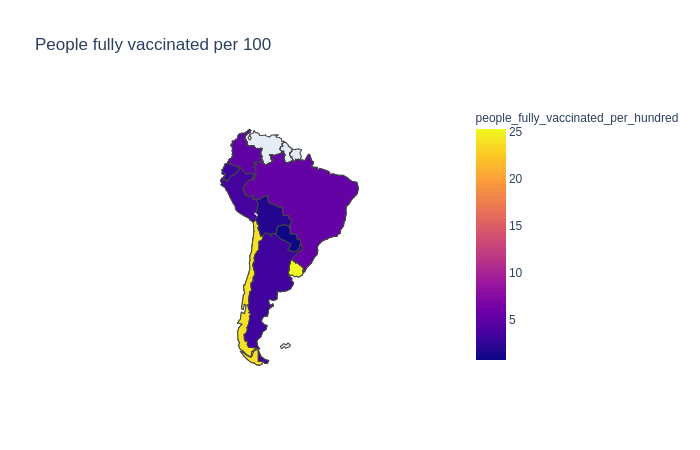

In [ ]:
# A choropleth map of the people fully vaccinated in LA 
g5 = px.choropleth (data_frame = merge_dfs, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'south america', title = 'People fully vaccinated per 100')
g5.show('png')

In [49]:
# Grouping the initial data frame by location
df_group =  df.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)
df_group.head()

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,day,month,year
80,Gibraltar,42626.91,24646.95,21687.41,751.31,466.31,126.52,73.16,64.37,13840.69,15.99,3.68,2021.00
70,Falkland Islands,2360.50,1778.50,1746.00,nan,74.74,67.77,51.06,50.13,21459.42,14.72,2.88,2021.00
215,United Arab Emirates,8427654.26,5557431.29,4541672.14,83951.97,80781.15,85.21,56.19,45.92,8167.61,15.41,3.71,2021.00
100,Israel,7952442.87,4354806.14,3907110.86,54237.19,54285.16,91.88,50.31,45.14,6271.71,15.77,4.19,2020.94
38,Cayman Islands,57520.43,32666.91,26518.94,640.75,488.82,87.52,49.71,40.35,7437.91,15.54,3.91,2020.97


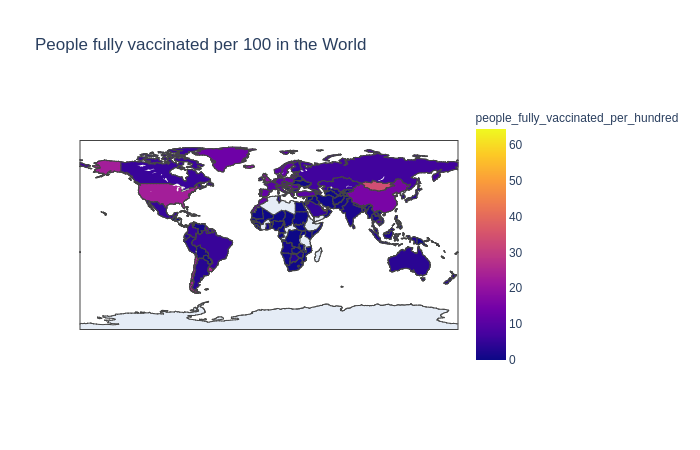

In [50]:
# A choropleth map of the people fully vaccinated in the World
g6 = px.choropleth (data_frame = df_group, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'world', title = 'People fully vaccinated per 100 in the World')
g6.show('png')